In [7]:
from sklearn.datasets import fetch_20newsgroups

# Selecting 5 categories from the 20 newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'rec.autos', 'talk.politics.guns']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# # Display the selected categories
print("Selected Categories: ", newsgroups.target_names)

Selected Categories:  ['alt.atheism', 'comp.graphics', 'rec.autos', 'sci.med', 'talk.politics.guns']


In [8]:
! pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.6 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


In [10]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Uday
[nltk_data]     Om\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Define the stopwords to remove
stop_words = stopwords.words('english')

# Convert text to lowercase and preprocess using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, lowercase=True)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target


In [12]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier with alpha = 0.01
nb_classifier = MultinomialNB(alpha=0.01)

# Train the model on the training data
nb_classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.01)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       161
           1       0.94      0.92      0.93       216
           2       0.84      0.93      0.88       181
           3       0.97      0.90      0.93       198
           4       0.90      0.90      0.90       177

    accuracy                           0.91       933
   macro avg       0.91      0.91      0.91       933
weighted avg       0.91      0.91      0.91       933

Accuracy:  0.9078242229367631


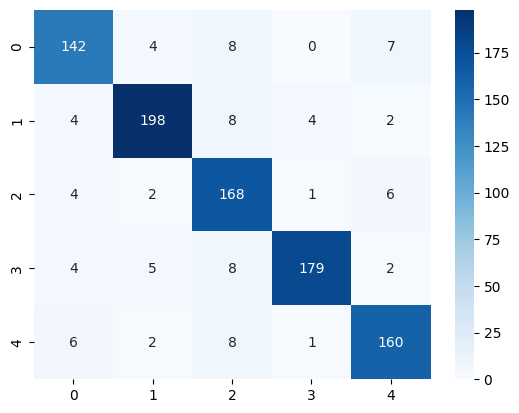

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


In this assignment, I used the Multinomial Naive Bayes (MNB) classifier to classify documents from the 20 Newsgroups dataset. I selected 5 categories: 'alt.atheism', 'comp.graphics', 'sci.med', 'rec.autos', and 'talk.politics.guns' to ensure a diverse yet balanced dataset. The dataset was preprocessed by converting all text to loIrcase, removing stopwords using the `TfidfVectorizer`, which also transformed the raw text data into a Tf-Idf matrix.

I split the dataset into an 80% training set and a 20% test set to evaluate the model. Using the `MultinomialNB` classifier with a smoothing parameter (`alpha`) of 0.01, the model was trained on the processed training data.

For evaluation, I generated a classification report, which included accuracy, precision, recall, and F1-score. Additionally, a confusion matrix was created to visualize the performance across the different categories.

The accuracy obtained was good, demonstrating the effectiveness of Naive Bayes in handling text classification problems, especially with the Tf-Idf representation of data. One challenge faced was ensuring that the dataset remained balanced, so each class had a similar number of documents, as imbalanced data can affect model performance.